### and, or – в if!

In [79]:
x = 4
if x > 2 and x < 10:
    print('Между 2 и 10')

Между 2 и 10


In [80]:
x = 4
if x % 2 == 0 or x > 100:
    print('Делится на 2 без остатка или больше 100')

Делится на 2 без остатка или больше 100


In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# &, | – в масках!

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(data={
    'name': ['Alex', 'Mary', 'Eugene', 'Nick'],
    'age': [18, 15, 20, 24],
    'gender': ['M', 'F', 'M', 'M']
})

In [71]:
df.describe()

,age
count,4.000000
mean,19.250000
std,3.774917
min,15.000000
25%,17.250000
50%,19.000000
75%,21.000000
max,24.000000


Вывод: всего 4.

In [8]:
df

,name,age,gender
0,Alex,18,M
1,Mary,15,F
2,Eugene,20,M
3,Nick,24,M


In [9]:
m = df['name'].apply(lambda s: len(s) == 4)
df.loc[ m ]

,name,age,gender
0,Alex,18,M
1,Mary,15,F
3,Nick,24,M


In [10]:
df.loc[ ~m ]

,name,age,gender
2,Eugene,20,M


In [11]:
age_mask = df['age'] >= 21
df.loc[ age_mask ]

,name,age,gender
3,Nick,24,M


In [12]:
df.loc[~m | age_mask, ['name', 'gender']]

,name,gender
2,Eugene,M
3,Nick,M


In [13]:
df.loc[~m & age_mask, ]

,name,age,gender


In [14]:
df[~m]

,name,age,gender
2,Eugene,20,M


In [3]:
mask1 | mask2, mask1 & mask2, ~mask1

NameError: name 'mask1' is not defined

---

### Про форматирование в тетради

Текст **bold text**

* asjdn
* asjnd

<div class="alert alert-info">
    Привет, мой <b>дорогой</b> ревьюер!
</div>

<div class="alert alert-success">
    Привет, мой дорогой ревьюер!
</div>

<div class="alert alert-warning">
    Привет, мой дорогой ревьюер!
</div>

<div class="alert alert-danger">
    Привет, мой дорогой ревьюер!
</div>

### Комментарии – где нужны

In [81]:
2*np.pi/3    # 120˚

2.0943951023931953

---

### List comrehentions

In [15]:
s = {x for x in range(1, 6)}

In [16]:
s[1]

TypeError: 'set' object is not subscriptable

In [17]:
1 in s

True

In [18]:
7 in s

False

In [19]:
s2 = set(range(3,8))

In [20]:
s2

{3, 4, 5, 6, 7}

In [21]:
s & s2

{3, 4, 5}

In [22]:
s | s2

{1, 2, 3, 4, 5, 6, 7}

### Кэширование

In [23]:
def f(x):
    return x**2 - 10


d = {}
def f_cached(x):
    if x in d:
        print('Used saved value')
        return d[x]
    
    print(f'Got new value: {x}')
    result = f(x)
    d[x] = result
    return result

In [24]:
for i in range(10):
    print(f(i))

for i in range(10):
    print(f(i))

-10
-9
-6
-1
6
15
26
39
54
71
-10
-9
-6
-1
6
15
26
39
54
71


In [25]:
for i in range(10):
    print(f_cached(i))

for i in range(10):
    print(f_cached(i))

Got new value: 0
-10
Got new value: 1
-9
Got new value: 2
-6
Got new value: 3
-1
Got new value: 4
6
Got new value: 5
15
Got new value: 6
26
Got new value: 7
39
Got new value: 8
54
Got new value: 9
71
Used saved value
-10
Used saved value
-9
Used saved value
-6
Used saved value
-1
Used saved value
6
Used saved value
15
Used saved value
26
Used saved value
39
Used saved value
54
Used saved value
71


### Распрямление массивов

In [82]:
a = [[1,2], [1,3,5], [3,5,6,7]]

In [83]:
[y for x in a for y in x]

[1, 2, 1, 3, 5, 3, 5, 6, 7]

### Про распаковку параметров и где это может пригодиться

In [84]:
import matplotlib.pyplot as plt

In [85]:
xs = [1,2,5,6]
ys = [2,5,7,8]

In [86]:
scatter_params = {'lw': 5, 'c': 'dodgerblue'}  # lw = line width

In [87]:
# keyword arguments

In [88]:
scatter_params = dict(lw=5, c='dodgerblue')

In [89]:
import seaborn

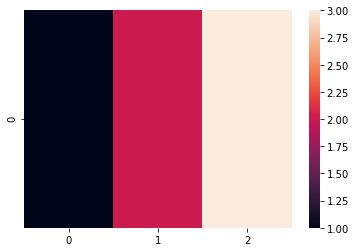

In [90]:
seaborn.heatmap([[1,2,3]], label='Heatmap')


In [91]:
def f(*args, **kwargs):
    print('args:', args, 'of length', len(args))
    print('kargs:', kwargs)

In [92]:
# positional arguments
f(1,2,3,412,1,2,123,1)

args: (1, 2, 3, 412, 1, 2, 123, 1) of length 8
kargs: {}


In [93]:
f(**scatter_params)

args: () of length 0
kargs: {'lw': 5, 'c': 'dodgerblue'}


In [94]:
**scatter_params

SyntaxError: invalid syntax (<ipython-input-94-d9fe992d8e52>, line 1)

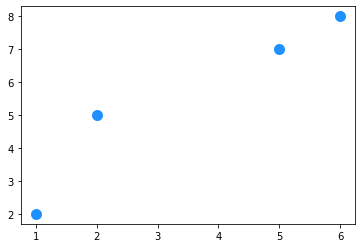

In [95]:
plt.scatter(xs, ys, **scatter_params)

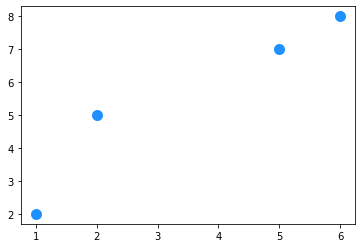

In [96]:
plt.scatter(xs, ys, lw=5, c='dodgerblue')

### Перечисляя объекты через запятую неявно создаем кортеж (tuple)

In [98]:
def f(x):
    return x-1, x+1

In [99]:
f(4)

(3, 5)

---

### Области видимости

In [100]:
df = pd.DataFrame(data={
    'name': ['Alex', 'Mary', 'Eugene', 'Nick'],
    'age': [18, 15, 20, 24],
    'gender': ['M', 'F', 'M', 'M']
})

In [101]:
age_column = 'age'
df

,name,age,gender
0,Alex,18,M
1,Mary,15,F
2,Eugene,20,M
3,Nick,24,M


In [102]:
# scope

In [103]:
def mean_age(df):
    age_column = 'agggge'
    m = df[age_column].mean()
    return m

In [104]:
def mean_age(df):
    global age_column # АНТИПРАВИЛЬНО
    age_column = 'agggge'
    m = df[age_column].mean()
    return m

In [105]:
age_column

'age'

In [106]:
mean_age(df)

KeyError: 'agggge'

### Print

In [40]:
print(1,2,3, sep='\t')
print(112,22,32, sep='\t')

1	2	3
112	22	32


In [42]:
import numpy as np

In [44]:
a = np.ones((5,6), dtype=np.int32)

In [45]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print(a[i][j], end=' ')
    print()

1 1 1 1 1 1 
1 1 1 1 1 1 
1 1 1 1 1 1 
1 1 1 1 1 1 
1 1 1 1 1 1 


In [41]:
print(1,2,3, sep='\t', end='')
print(112,22,32, sep='\t', end='')

1	2	3112	22	32

### Форматирование строк

In [107]:
'I have {} apples {}, asjnas {} jnjasnd {}'.format(5, 2,3,4)

'I have 5 apples 2, asjnas 3 jnjasnd 4'

In [108]:
f'I have {5} apples'

'I have 5 apples'

### Проверка на None

In [109]:
def f(x):
    if x < 0:
        return
    return np.sqrt(x)

In [110]:
f(-4)

In [111]:
f(4)

2.0

In [115]:
if f(-4) is None:
    print('Только так!')

Только так!


In [113]:
if not f(-4):
    print('NOT LIKE THAT')

NOT LIKE THAT


In [114]:
if f(-4) == None:
    print('ТОЖЕ ЛУЧШЕ НЕ НАДО')

ТОЖЕ ЛУЧШЕ НЕ НАДО


---